# **Image Colorization With GANs**

## **1. Loading and Processing the data**

In [5]:
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
import os
import urllib.request
from tensorflow.python.keras.models import load_model

img_size = 120

In [6]:
def load_input_url(imgpath):
    urllib.request.urlretrieve(imgpath,"input.jpg")
    rgb_image = Image.open("input.jpg").resize(( img_size , img_size ))
    gray_image = rgb_image.convert( 'L' )
    gray_img_array = ( np.asarray( gray_image ).reshape( ( img_size , img_size , 1 ) ) ) / 255
    return (gray_img_array,rgb_image)

def load_input(imgpath):
    rgb_image = Image.open(imgpath).resize(( img_size , img_size ))
    gray_image = rgb_image.convert( 'L' )
    gray_img_array = ( np.asarray( gray_image ).reshape( ( img_size , img_size , 1 ) ) ) / 255
    return (gray_img_array,rgb_image)

In [8]:
generator = load_model('gen.h5',compile=False)

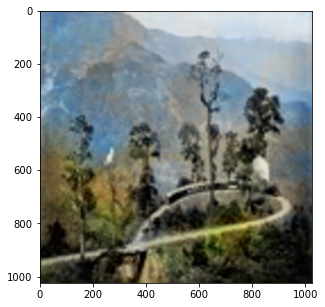

In [9]:
(a,b) = load_input_url('https://www.sundayguardianlive.com/wp-content/uploads/2018/02/BS10FT08_PHY.01551%20copy.JPG')
y = generator(np.array([a])).numpy()
image = Image.fromarray( ( y[0] * 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
image = np.asarray( image )
plt.figure(figsize=(5,5))
plt.imshow( image )